<table align="left">
  <td>
    <a target="_blank" href="https://www.kaggle.com/mateuszszczepanek/prediction-diabetes"><img src="https://cdn.iconscout.com/icon/free/png-128/kaggle-3628869-3030009.png" />Open in Kaggle</a>
  </td>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = "../input/diabetes/diabetes.csv"
df = pd.read_csv(file)
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1


### Checking for missing values.

In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Description of the entire DataFrame.

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


### Checking how many people there are with diabetes.

In [5]:
df["Outcome"].value_counts().to_frame()

,Outcome
0,1316
1,684


### Check which feature has the greatest impact on the final result.

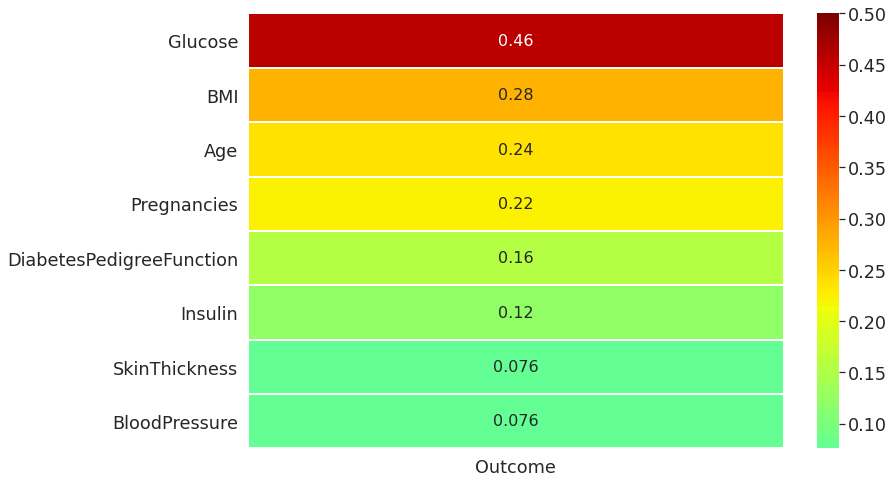

In [6]:
cor = df.corr().iloc[ : , -1].sort_values(ascending=False)[1:].to_frame()
sns.set(font_scale=1.6)
plt.figure(figsize=(12, 8))
sns.heatmap(data= cor, cmap="jet",center=0.1, annot=True, vmax=.5, linewidths=0.1,annot_kws={"size": 16})
plt.show()

### Division of a data set into a dependent variable and an independent variable.

In [7]:
# independent variable
X = df.iloc[ : , : -1]

# dependent variable
y = df.Outcome

### The division of values into a training set and a test set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

### Creating an estimator model and training it.

In [9]:
model = LogisticRegression(max_iter=125)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"The model correctly classifies with {score*100:.2f}% accuracy.")

y_pred = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

The model correctly classifies with 83.00% accuracy.


,0,1
0,245,21
1,47,87


In [10]:
print(f"The model predicts disease with the following accuracy:\n\n\
Healthy people - classified as\n\t\
No disease = {cm[0][0]}/{cm.loc[0].sum()}\n\tDisease = {cm[1][0]}/{cm.loc[0].sum()}\n\n\
\
Sick people - diabetic - classified as\n\t\
No disease = {cm[0][1]}/{cm.loc[1].sum()}\n\tDisease = {cm[1][1]}/{cm.loc[1].sum()}")

The model predicts disease with the following accuracy:

Healthy people - classified as
	No disease = 245/266
	Disease = 21/266

Sick people - diabetic - classified as
	No disease = 47/134
	Disease = 87/134


### Check the predictions as you may have diabetes or not.

In [11]:
# Pregnancies: Number of times pregnant
PREGNANCIES = int(df.Pregnancies.mean())

# Plasma glucose concentration over 2 hours in an oral glucose tolerance test 
GLUCOSE = int(df.Glucose.mean())

# Diastolic blood pressure (mm Hg)
BLOODPRESSURE = int(df.BloodPressure.mean())

# Triceps skin fold thickness (mm)
SKINTHICKNESS = int(df.SkinThickness.mean())

# 2-Hour serum insulin (mu U/ml)
INSULIN = int(df.Insulin.mean())

# Body mass index (weight in kg/(height in m)2)
BMI = df.BMI.mean()

# DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
DIABETESPEDIGREEFUNCTION = df.DiabetesPedigreeFunction.mean()

# Age (years)
AGE = int(df.Age.mean())

In [12]:
sample = {
    'Pregnancies': PREGNANCIES, 
    'Glucose': GLUCOSE, 
    'Bloodpressure': BLOODPRESSURE, 
    'Skinthickness': SKINTHICKNESS, 
    'Insulin': INSULIN,
    'Bmi': BMI, 
    'Diabetespedigreefunction': DIABETESPEDIGREEFUNCTION, 
    'Age':AGE,
}

In [13]:
if None in sample.values():
    print("Please do not leave any variable with the 'None' value.")
else:
    trial = pd.DataFrame.from_dict(data=sample, orient='index').T
    print(f"Outcome: {model.predict(trial)[0]} - (0 if non-diabetic, 1 if diabetic)")
    print(f"The probability of no disease {model.predict_proba(trial)[0][0]*100:.2f}%\nThe probability of disease {model.predict_proba(trial)[0][1]*100:.2f}%")

Outcome: 0 - (0 if non-diabetic, 1 if diabetic)
The probability of no disease 72.33%
The probability of disease 27.67%
